In [51]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
import copy
from os.path import isfile, join


from importnb import Notebook
ShapDetectorClass = Notebook.load('Backend.ipynb')
ShapDetector = ShapDetectorClass.ShapDetector

In [52]:
plt.style.use('ggplot')
plt.style.use('seaborn-white')

In [53]:
def plot_stats(true_drifts, drift_detections, dist_list, shap_list, score_list, plot_steps, p_list=5):
    plt.figure(figsize = (30,20))
    
    ax1 = plt.subplot(4, 1, 1)
    create_abs_shap_plot(true_drifts, drift_detections, shap_list, plot_steps)
    
    plt.subplot(4, 1, 2, sharex=ax1)
    create_acc_plot(true_drifts, drift_detections, score_list, plot_steps)
    
    plt.subplot(4, 1, 3, sharex=ax1)
    create_dist_plot(true_drifts, drift_detections, dist_list, plot_steps)
    
    plt.subplot(4, 1, 4, sharex=ax1)
    create_shap_plot(true_drifts, drift_detections, shap_list, plot_steps)

    
def create_dist_plot(true_drifts, drift_detections, dist_list, plot_steps, window_size=50):            
    # compute rolling mean of distance
    dist_series = pd.Series(dist_list)
    windows = dist_series.rolling(window_size)
    moving_averages = windows.mean()
    moving_averages_list = moving_averages.tolist()    
    plt.plot(moving_averages_list,  linewidth=1.1, color = 'green')#label = 'Distance', 

    #true drift points
    for d in true_drifts:
        plt.axvline(d, color = 'red', linewidth=1)
    
    #detected drift points
    j = 1
    for i in drift_detections:
        plt.axvline(i, color = 'black', linewidth=0.7)
        j += 1
        
    plt.xticks(np.arange(0, len(dist_list), plot_steps), rotation=20, fontsize= 20)
    plt.xlabel('Processed instances', fontsize = 20)
    #plt.xlim([0, len(dist_list)+1])
    plt.yticks(fontsize = 20)
    plt.ylabel('Distance', fontsize = 20)
    plt.legend()
    
    return 

def create_shap_plot(true_drifts, drift_detections, shap_list, plot_steps, window_size=50):
    shap_transposed = list(map(list, zip(*shap_list)))
        
    cnt=1
    for s_values in shap_transposed:
        dist_series = pd.Series(s_values)
        windows = dist_series.rolling(window_size)
        moving_averages = windows.mean()
        moving_averages_list = moving_averages.tolist()
        plt.plot(moving_averages_list,  linewidth=1.6)#, label = 'F{}'.format(cnt)
        cnt+=1
            
    #true drift points
    for d in true_drifts:
        plt.axvline(d, color = 'red', linewidth=2)
    
    #detected drift points
    j = 1
    for i in drift_detections:
        plt.axvline(i, color = 'black', linewidth=0.2)
        j += 1
    
    plt.xticks(np.arange(0, len(shap_list), plot_steps), rotation=20, fontsize= 20)
    plt.xlabel('Processed instances', fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.ylabel('Shapley Values', fontsize = 20)


    plt.legend()

    return 

def create_abs_shap_plot(true_drifts, drift_detections, shap_list, plot_steps, window_size=50):
    shap_transposed = np.abs(list(map(list, zip(*shap_list))))
        
    cnt=1
    for s_values in shap_transposed:
        dist_series = pd.Series(s_values)
        windows = dist_series.rolling(window_size)
        moving_averages = windows.mean()
        moving_averages_list = moving_averages.tolist()
        plt.plot(moving_averages_list,  linewidth=1.6, label = 'F{}'.format(cnt))
        cnt+=1
    
    #true drift points
    for d in true_drifts:
        plt.axvline(d, color = 'red', linewidth=2.2)
    
    #detected drift points
    j = 1
    for i in drift_detections:
        plt.axvline(i, color = 'black', linewidth=0.5)
        j += 1
        
    plt.xticks(np.arange(0, len(shap_list), plot_steps), rotation=20, fontsize = 20)
    plt.xlabel('Processed instances', fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.ylabel('Absolute Shapley Value', fontsize = 20)

    return 

def create_acc_plot(true_drifts, drift_detections, score_list, plot_steps, window_size=50):    
    # compute rolling mean of accuracy
    dist_series = pd.Series(score_list)
    windows = dist_series.rolling(window_size)
    moving_averages = windows.mean()
    moving_averages_list = moving_averages.tolist()
    plt.plot(moving_averages_list,  linewidth=1,color = 'blue') # label = 'Accuracy', 
    
    # compute rolling mean of f1-score
    dist_series = pd.Series(weighted_f1_list)
    windows = dist_series.rolling(window_size)
    moving_averages = windows.mean()
    moving_averages_list = moving_averages.tolist()
    # additionally plot F1-score
    #plt.plot(moving_averages_list,  linewidth=1.1, label = 'Weighted F1', color = 'orange')
    
    
    #true drift points
    for d in true_drifts:
        plt.axvline(d, color = 'red', linewidth=2.2)
    
    #detected drift points
    j = 1
    for i in drift_detections:
        plt.axvline(i, color = 'black', linewidth=0.5)
        j += 1
        
    plt.xticks(np.arange(0, len(score_list), plot_steps), rotation=20, fontsize=20)
    plt.xlabel('Processed instances', fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.ylabel('Accuracy Score', fontsize = 20)
    plt.legend()
    
    return

In [54]:
# get filenames
#path = "../Results/Detector_objs/Test_Sine_abrupt"  
#path = "../Results/Detector_objs/Test_Mixed_abrupt"
#path = "../Results/Detector_objs/Validation_Sine_abrupt" 
path = "../Results/Detector_objs/Validation_Mixed_abrupt" 


files = [f for f in listdir(path) if isfile(join(path, f))]

In [55]:
#files.remove('.DS_Store')
#files

In [56]:
# get all detectors from folder
acc_list = []
detector_list = []
for f in files:
     if f != '.DS_Store': 
        d = pickle.load(open("{0}/{1}".format(path,f), "rb"))
        detector_list.append(d)   
        
        # store accuracy in case of no retraining option for later plotting
        if d.ad_delta == 9999: # ad.delta=9999 corresponds to no retraining 
            acc_list = d.score_list
    
     else:
        print('Achtung, DS Store nicht gelöscht!')

In [57]:
# plot and store results
### if only the accuracy curve is plottet, the corresponding object origins from a test run with performance-based detection enabled
df_statistics = pd.DataFrame()
for idx,detector in enumerate(detector_list):
    # Plots
    shap_list  = detector.shap_list
    score_list = detector.score_list
    weighted_f1_list = detector.weighted_f1_list
    dist_list = detector.distances
    drift_detections = detector.drift_detections
    true_drifts = detector.true_drift_points
    
    plt.clf()
    plot_steps = 1000
    
    ## remove below comment to plot results for every run
    #fig = plot_stats(true_drifts, drift_detections, dist_list, shap_list, score_list, plot_steps = plot_steps)#, p_list)

    #plt.savefig("../Results/Plots/{0}_Plot.jpg".format(files[idx]))
    
    # Table
    statistics = detector.get_statistics(drift_range=0)
    statistics["filename"] = files[idx]
    df_statistics = df_statistics.append(statistics, ignore_index=True, sort=False)

Mean of empty slice.
invalid value encountered in double_scalars


<Figure size 432x288 with 0 Axes>

In [58]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)  
cols = [
        'filename', 'Model', 'Error Based', 
        'Initial Instances', 'Approach', 'Retrainsize', 'Samplesize', 
        'Base Detector',
        'Ad Delta',
        'Ks Alpha',
        'Ph Alpha', 'Ph Delta','Ph Min Inst', 'Ph Threshold', 
        'FAC','MDC', 'MDR', 'MTD', 'MTFA', 'MTR', 'True Drift Points', 'Triggered Drifts', 'Detections Count',
        'Labels Detection %','Labels Retraining %','Sampling', 'Weighted F1', 'Mcc', 'ROC_AUC', 'Acc']

df_statistics = df_statistics[cols]
df_statistics.sort_values(by=['ROC_AUC','Acc', 'Ad Delta'], ascending=[False,False, False], inplace=True)
#df_statistics

### Further Plots

In [59]:
# Sort out objects that should not be plotted.
df_statistics = df_statistics[df_statistics['Ad Delta']!=9999] # sort out "no retraining" option
#df_statistics = df_statistics[df_statistics['Error Based'] == 'True'] # sort out explanations-based runs
df_statistics = df_statistics[df_statistics['Base Detector']!='kswin'] # sort out runs with KSWIN detector
df_statistics = copy.deepcopy(df_statistics)
# .. further sorting out if needed ..

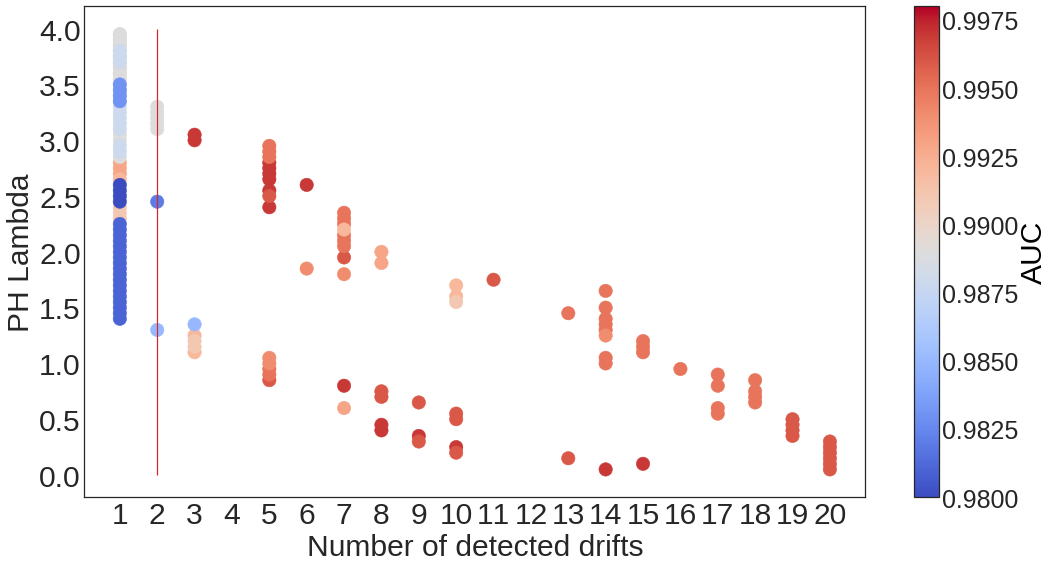

In [60]:
import matplotlib as mpl
plt.style.use('seaborn-white')
#plt.style.use('ggplot')
norm = mpl.colors.Normalize(vmin=5, vmax=10)
cmap = mpl.cm.coolwarm
fig, ax = plt.subplots(1)

ax.vlines(2,0, 4, color='tab:red', label='Shap 100%', lw = 1.2)

plt.scatter(x = df_statistics['Detections Count'], y = df_statistics['Ph Threshold'], c = df_statistics['ROC_AUC'], cmap=plt.cm.coolwarm, s = 180)
plt.xlabel("Number of detected drifts", fontsize = 30)
plt.xticks(np.arange(min(df_statistics['Detections Count']), max(df_statistics['Detections Count'])+1, 1), fontsize = 30)
plt.ylabel("PH Lambda", fontsize = 30)
plt.yticks(fontsize = 30)

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=25)
cbar.set_label("AUC", labelpad=1, color='black', fontsize = 30)


fig.set_size_inches(15,8)
fig.tight_layout() 
#plt.savefig("../Results/Validation_Sine_abrupt_ph_RdBu.jpg")
plt.show()

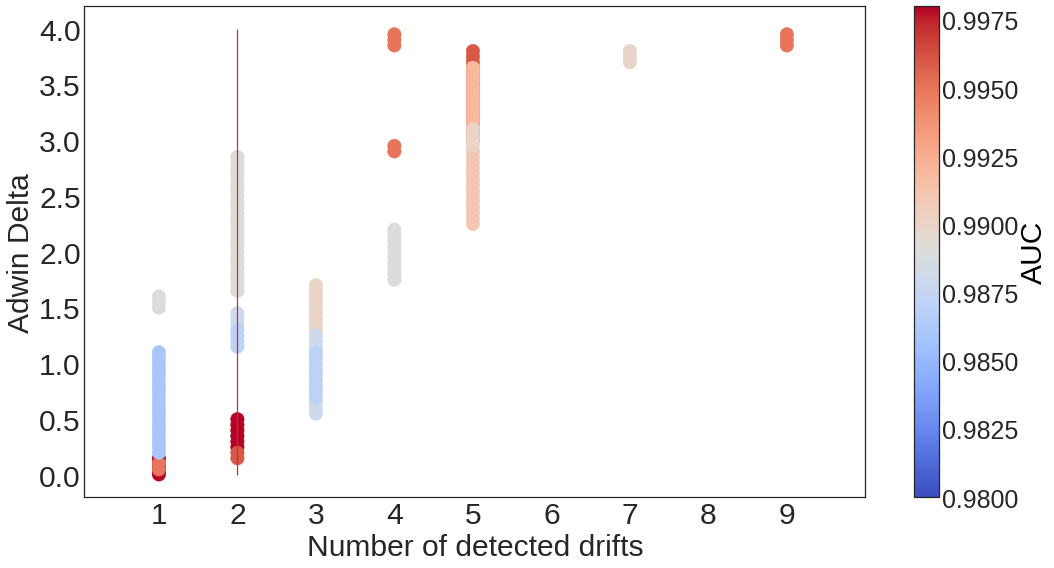

In [61]:
import matplotlib as mpl
plt.style.use('seaborn-white')
#plt.style.use('ggplot')
norm = mpl.colors.Normalize(vmin=5, vmax=10)
#cmap = mpl.cm.coolwarm
fig, ax = plt.subplots(1)

ax.vlines(2,0, 4, color='tab:red', label='Shap 100%', lw = 1.2)

plt.scatter(x = df_statistics['Detections Count'], y = df_statistics['Ad Delta'], c = df_statistics['ROC_AUC'], cmap=plt.cm.coolwarm, s = 180)
plt.xlabel("Number of detected drifts", fontsize = 30)
plt.xticks(np.arange(min(df_statistics['Detections Count']), max(df_statistics['Detections Count'].where(df_statistics['Base Detector'] == 'adwin'))+1, 1), fontsize = 30) 

plt.ylabel("Adwin Delta", fontsize = 30)
plt.yticks(fontsize = 30)

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=25)
cbar.set_label("AUC", labelpad=1, color='black', fontsize = 30)


plt.xlim(right=max(df_statistics['Detections Count'].where(df_statistics['Base Detector'] == 'adwin'))+1)

fig.set_size_inches(15,8)
fig.tight_layout() 
#plt.savefig("../Results/Validation_Sine_abrupt_ph_RdBu.jpg")
plt.show()